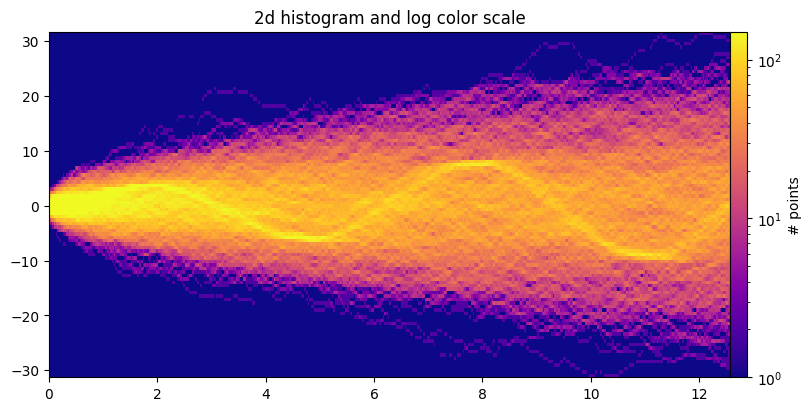

In [2]:
#| label: my-img

# https://matplotlib.org/stable/gallery/statistics/time_series_histogram.html#sphx-glr-gallery-statistics-time-series-histogram-py
from copy import copy

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy.matlib

num_series = 1000
num_points = 100
SNR = 0.10  # Signal to Noise Ratio
x = np.linspace(0, 4 * np.pi, num_points)
Y = np.cumsum(np.random.randn(num_series, num_points), axis=-1)
num_signal = int(round(SNR * num_series))
phi = (np.pi / 8) * np.random.randn(num_signal, 1)  # small random offset
Y[-num_signal:] = (
    np.sqrt(np.arange(num_points))[None, :]  # random walk RMS scaling factor
    * (np.sin(x[None, :] - phi)
       + 0.05 * np.random.randn(num_signal, num_points))  # small random noise
)
num_fine = 800
x_fine = np.linspace(x.min(), x.max(), num_fine)
y_fine = np.empty((num_series, num_fine), dtype=float)
for i in range(num_series):
    y_fine[i, :] = np.interp(x_fine, x, Y[i, :])
y_fine = y_fine.flatten()
x_fine = np.matlib.repmat(x_fine, num_series, 1).flatten()

fig, axes = plt.subplots(figsize=(8, 4), constrained_layout=True)
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))
h, xedges, yedges = np.histogram2d(x_fine, y_fine, bins=[400, 100])
pcm = axes.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         norm=LogNorm(vmax=1.5e2), rasterized=True)
fig.colorbar(pcm, ax=axes, label="# points", pad=0)
axes.set_title("2d histogram and log color scale");

In [3]:
from manim import *
config.background_color = BLUE_D
param = "-v WARNING -r 500,180  Example"
config.media_embed = True

Manim Community v0.17.1

In [4]:
#| label: my-vid-embedded

Circle.set_default(color=YELLOW_D, fill_opacity=1)
Square.set_default(color=YELLOW, fill_opacity=1)
Triangle.set_default(color=YELLOW_D, fill_opacity=1)

class Example(Scene):
    def construct(self):
        g = Group(Square().scale(2.3), Circle().scale(1.7))
        self.add(g.shift(2*LEFT))
        self.wait()
        self.play(g.animate.shift(4*RIGHT))
        self.wait()
%manim $param

In [5]:
config.media_embed = False

In [6]:
#| label: my-vid-not-embedded

Circle.set_default(color=GREEN_A, fill_opacity=1)
Square.set_default(color=GREEN_E, fill_opacity=1)
Triangle.set_default(color=GREEN_A, fill_opacity=1)

class Example(Scene):
    def construct(self):
        g = Group(Square().scale(2.3), Circle().scale(1.7))
        self.add(g.shift(2*LEFT))
        self.wait()
        self.play(g.animate.shift(4*RIGHT))
        self.wait()

%manim $param

Jupyter compare_view v0.2.0



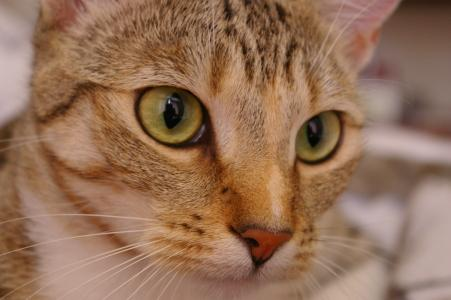
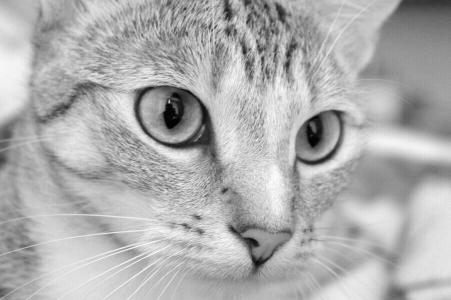

In [7]:
#| label: my-widget

from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
from jupyter_compare_view import compare

image = Image.open(requests.get("https://raw.githubusercontent.com/scikit-image/scikit-image/main/skimage/data/chelsea.png", stream=True).raw)
image = np.uint8(image)
image_grey = image[:,:,0]

compare(image, image_grey, add_controls=False, start_mode="horizontal", start_slider_pos= 0.23, cmap="gray")

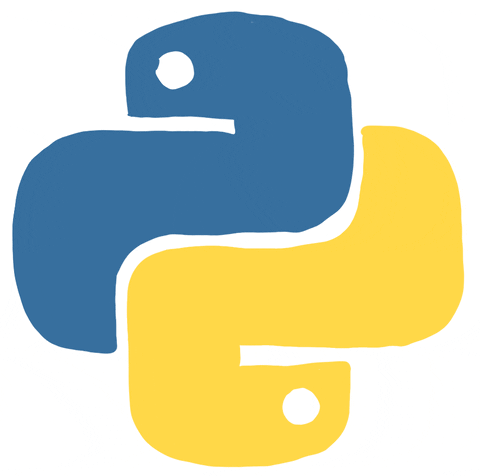

In [8]:
#| label: my-gif

import requests
from IPython.display import Image

url = "https://media.giphy.com/media/KAq5w47R9rmTuvWOWa/giphy.gif"
response = requests.get(url)
img = Image(response.content)
display(img)
